In [146]:
from os import listdir
from os.path import isfile, join
import csv
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

## Data Exploration

In [2]:
mypath = "../train/"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
whale_info = {}

with open("../train.csv") as file:
    t = csv.DictReader(file, delimiter=",")
   
    
    for line in t:
    
        if line["Id"] in whale_info:
            whale_info[line["Id"]] += 1
        else:
            whale_info[line["Id"]] = 1

print(len(whale_info), len(onlyfiles))

5005 25361


##### So we got 5005 unique whales that we gotta identify them using 25,361 training images

In [3]:
histogram_dict = {}

count = 1
for whale_num in whale_info.values():
    #exclude 
    if whale_num != 9664:
        histogram_dict[count] = whale_num
        count += 1 


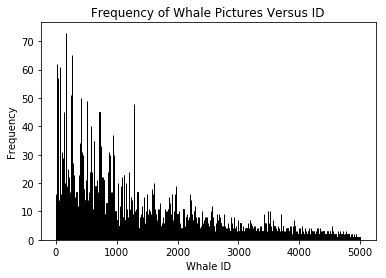

In [54]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.bar(histogram_dict.keys(), histogram_dict.values(), ec="k", align="edge")
plt.xlabel('Whale ID')
plt.ylabel('Frequency')
plt.title('Frequency of Whale Pictures Versus ID')

plt.show()

In [18]:
mypath = "../train/"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

ids_to_images = {}

with open("../train.csv") as file:
    t = csv.DictReader(file, delimiter=",")
   
    
    for line in t:
        if line["Id"] not in ids_to_images:
            ids_to_images[line["Id"]] = [line["Image"]]
        else:
            ids_to_images[line["Id"]].append(line["Image"])
        


## Train-Test Split

In [50]:


train_images = []
training_ids = []

test_images = []
test_ids = []
for whale_id, pictures in ids_to_images.items():
   
    train_images.extend(pictures[:len(pictures) - len(pictures)//4])
    training_ids.extend([whale_id] * (len(pictures) - len(pictures)//4))
    test_images.extend(pictures[len(pictures) - len(pictures)//4:])
    test_ids.extend([whale_id] * (len(pictures) - len(pictures)//4))
        
    

In [62]:
len(train_images)/len(onlyfiles)

0.8244943022751469

In [167]:
import shutil
def moveImages(images, path):
    for image in images:
        shutil.move(join(mypath, image), "../images/{}".format(path))

In [124]:
len(test_images)

4451

In [123]:
moveImages(test_images, "Test")

In [162]:
X_train, X_val, y_train, y_val = train_test_split(train_images, training_ids, test_size=0.2, random_state=42)

In [168]:
moveImages(X_train, "Train")
moveImages(X_val, "Validation")

## One Hot Vectorization

In [89]:
encoder_dict["w_9f30885"]

5005

In [87]:
encoder_dict = {}
for images, ints in zip(whale_info.keys(),range(1, len(whale_info.keys())+1)):
    encoder_dict[images] = ints

In [100]:
b = training_ids[:]
b.extend(test_ids)
a = [[encoder_dict[x]] for x in b]

In [96]:
encoder = OneHotEncoder()
encoder.fit(a)


OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)

In [119]:
encoder

OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)